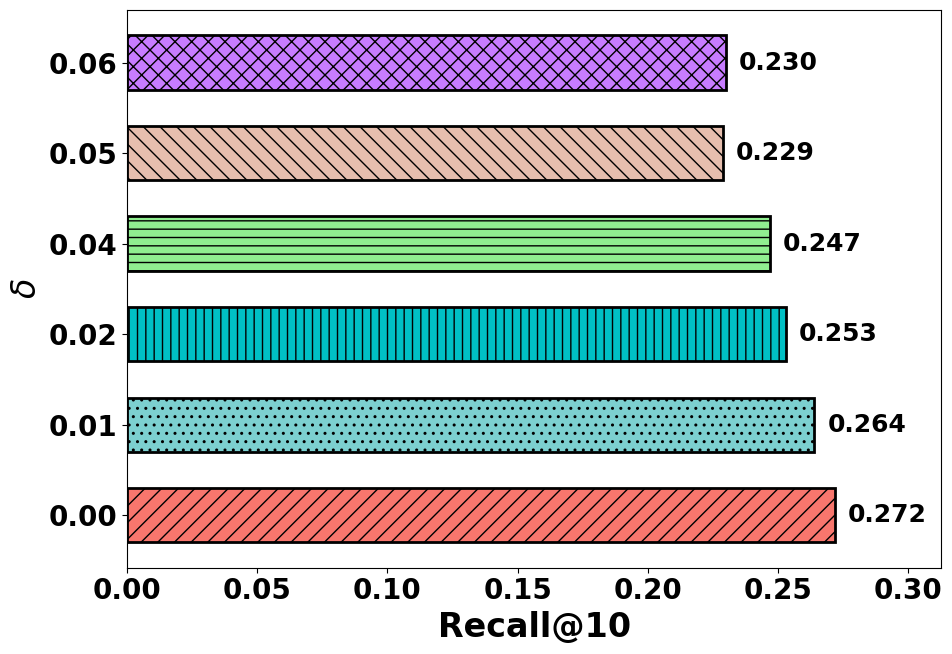

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# --- Data ---
categories = ['0.00', '0.01', '0.02', '0.04', '0.05', '0.06']
values = [0.272, 0.264, 0.253, 0.247, 0.229, 0.23]


# --- Styling for the bars ---
colors = ['#F8766D', '#7CD0D0', '#00BFC4', '#90EE90', '#E6BEAE', '#C77CFF']  # Added a new color
hatches = ['//', '..', '||', '--', '\\\\', 'xx']  # Added a new hatch pattern
edge_color = 'black'

# --- Create the plot ---
fig, ax = plt.subplots(figsize=(10, 7))

# Create horizontal bars
bars = ax.barh(
    categories,
    values,
    color=colors,
    edgecolor=edge_color,
    hatch=hatches,
    linewidth=2,
    height=0.6
)

# --- Customize labels and ticks ---
ax.set_xlabel('Recall@10', fontsize=24, fontweight='bold')
ax.set_ylabel(r'$\delta$', fontsize=24, fontweight='bold')  # δ on y-axis

# Tick label appearance
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontweight('bold')

# Add value labels at the end of bars
for bar in bars:
    width = bar.get_width()
    ax.text(
        width + 0.005, 
        bar.get_y() + bar.get_height() / 2, 
        f'{width:.3f}', 
        ha='left', va='center', 
        fontsize=18, fontweight='bold'
    )

# Remove grid
ax.grid(False)

# Set limits slightly higher for better spacing
ax.set_xlim(0, max(values) * 1.15)

plt.tight_layout()
plt.savefig('recall_vs_delta.png', dpi=300)
plt.show()


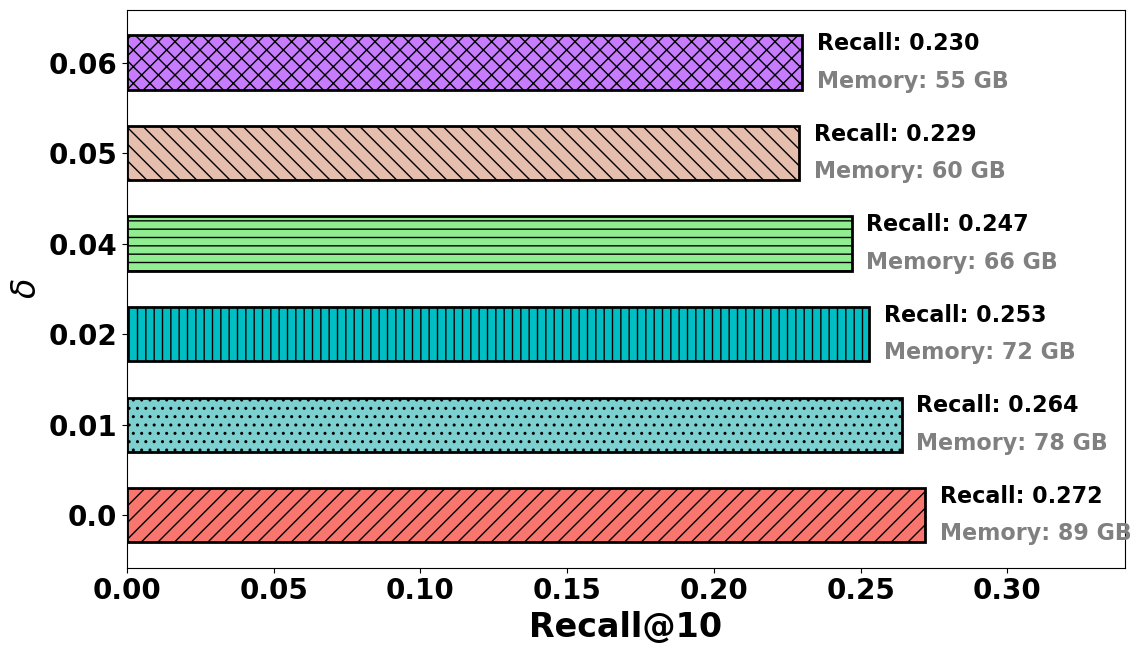

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# --- Data ---
categories = ['0.0', '0.01', '0.02', '0.04', '0.05', '0.06']
recall = [0.272, 0.264, 0.253, 0.247, 0.229, 0.23]
memory = [89, 78, 72, 66, 60, 55]  # memory usage in GB

# --- Styling for the bars ---
colors = ['#F8766D', '#7CD0D0', '#00BFC4', '#90EE90', '#E6BEAE', '#C77CFF']
hatches = ['//', '..', '||', '--', '\\\\', 'xx']
edge_color = 'black'

# --- Create the plot ---
fig, ax = plt.subplots(figsize=(12, 7))

bars = ax.barh(
    categories,
    recall,
    color=colors,
    edgecolor=edge_color,
    hatch=hatches,
    linewidth=2,
    height=0.6
)

# --- Customize labels and ticks ---
ax.set_xlabel('Recall@10', fontsize=24, fontweight='bold')
ax.set_ylabel(r'$\delta$', fontsize=24, fontweight='bold')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontweight('bold')

# --- Annotate each bar with Recall and Memory (all bold) ---
for i, bar in enumerate(bars):
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height()/2
    # Recall value on top
    ax.text(width + 0.005, y_pos + 0.08, f'Recall: {width:.3f}', 
            ha='left', va='bottom', fontsize=16, fontweight='bold')
    # Memory value below (bold as well)
    ax.text(width + 0.005, y_pos - 0.08, f'Memory: {memory[i]} GB', 
            ha='left', va='top', fontsize=16, fontweight='bold', color='gray')

# Remove grid
ax.grid(False)

# Set limits for spacing
ax.set_xlim(0, max(recall) * 1.25)

plt.tight_layout()
plt.savefig('recall_memory_annotations_vs_delta.png', dpi=300)
plt.show()


/tmp/ipykernel_53880/1374934776.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10')


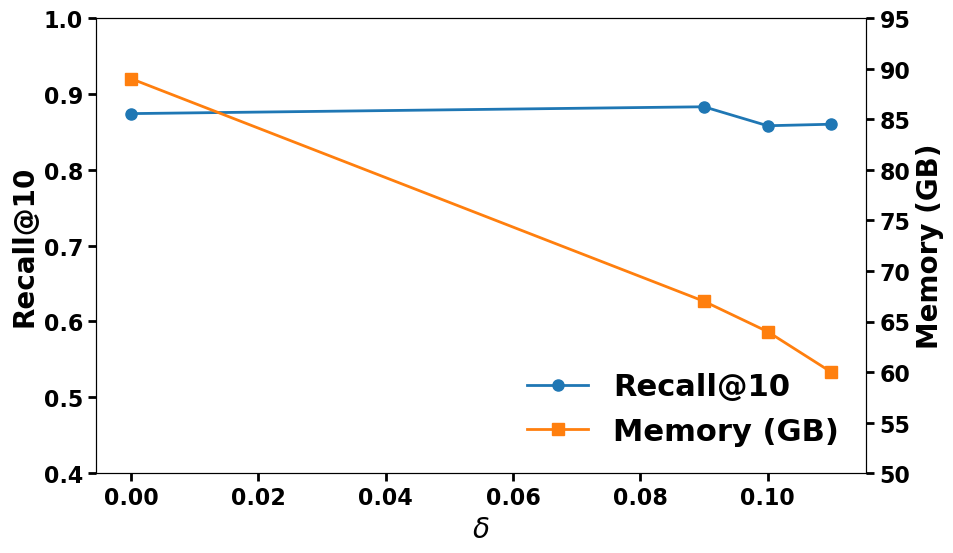

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# --- Data ---
delta = [0.0, 0.09, 0.10, 0.11]
recall = [0.874, 0.883, 0.858, 0.86]
memory = [89, 67, 64, 60]  # memory usage in GB

# --- Get tab10 colors ---
cmap = cm.get_cmap('tab10')
color_list = list(getattr(cmap, 'colors', [cmap(i / 10.0) for i in range(10)]))

# Use first two colors
colors = color_list[:2]

# --- Create figure and axis ---
fig, ax1 = plt.subplots(figsize=(10, 6))

# --- Turn off grid completely ---
ax1.grid(False)

# --- Plot Recall curve (circle markers) ---
ax1.plot(delta, recall, marker='o', color=colors[0], linewidth=2, markersize=8,
         label='Recall@10')
ax1.set_xlabel(r'$\delta$', fontsize=20, fontweight='bold')
ax1.set_ylabel('Recall@10', fontsize=20, fontweight='bold', color='black')

# --- Bold tick labels for ax1 ---
ax1.tick_params(axis='x', labelsize=16, width=2, length=6)
ax1.tick_params(axis='y', labelsize=16, width=2, length=6)
for tick in ax1.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax1.get_yticklabels():
    tick.set_fontweight('bold')

# --- Constrain recall y-axis between 0.4 and 1.0 ---
ax1.set_ylim(0.4, 1.0)

# --- Create right y-axis for Memory (square markers) ---
ax2 = ax1.twinx()
ax2.grid(False)

ax2.plot(delta, memory, marker='s', color=colors[1], linewidth=2, markersize=8,
         label='Memory (GB)')
ax2.set_ylabel('Memory (GB)', fontsize=20, fontweight='bold', color='black')

# --- Bold tick labels for ax2 ---
ax2.tick_params(axis='y', labelsize=16, width=2, length=6)
for tick in ax2.get_yticklabels():
    tick.set_fontweight('bold')

# --- Constrain memory y-axis between 50 and 95 (squeezed range) ---
ax2.set_ylim(50, 95)

# --- Legends moved to bottom right ---
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2,
           fontsize=16, loc='lower right', frameon=False, prop={'weight': 'bold'})

# --- Save and show ---
plt.tight_layout()
plt.savefig('recall_memory_vs_delta.png', dpi=300)
plt.show()


/tmp/ipykernel_53880/1930498243.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10')


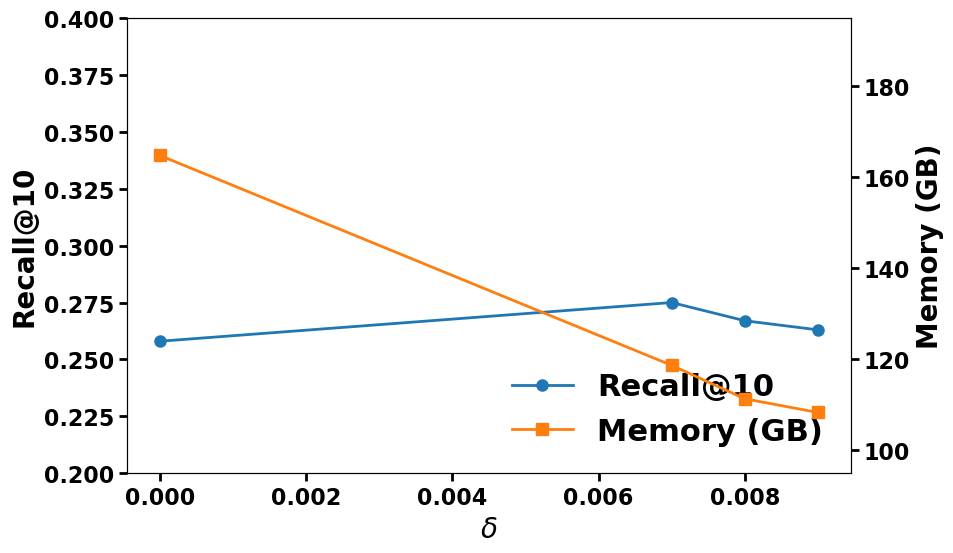

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# --- Data ---
delta = [0.0, 0.007, 0.008, 0.009]
recall = [0.258, 0.275, 0.267, 0.263]
memory = [164.8, 118.7, 111.36, 108.35]  # memory usage in GB

# --- Get tab10 colors ---
cmap = cm.get_cmap('tab10')
color_list = list(getattr(cmap, 'colors', [cmap(i / 10.0) for i in range(10)]))

# Use first two colors
colors = color_list[:2]

# --- Create figure and axis ---
fig, ax1 = plt.subplots(figsize=(10, 6))

# --- Turn off grid completely ---
ax1.grid(False)

# --- Plot Recall curve (circle markers) ---
ax1.plot(delta, recall, marker='o', color=colors[0], linewidth=2, markersize=8,
         label='Recall@10')
ax1.set_xlabel(r'$\delta$', fontsize=20, fontweight='bold')
ax1.set_ylabel('Recall@10', fontsize=20, fontweight='bold', color='black')

# --- Bold tick labels for ax1 ---
ax1.tick_params(axis='x', labelsize=16, width=2, length=6)
ax1.tick_params(axis='y', labelsize=16, width=2, length=6)
for tick in ax1.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax1.get_yticklabels():
    tick.set_fontweight('bold')

# --- Constrain recall y-axis between 0.4 and 1.0 ---
ax1.set_ylim(0.2, 0.4)

# --- Create right y-axis for Memory (square markers) ---
ax2 = ax1.twinx()
ax2.grid(False)

ax2.plot(delta, memory, marker='s', color=colors[1], linewidth=2, markersize=8,
         label='Memory (GB)')
ax2.set_ylabel('Memory (GB)', fontsize=20, fontweight='bold', color='black')

# --- Bold tick labels for ax2 ---
ax2.tick_params(axis='y', labelsize=16, width=2, length=6)
for tick in ax2.get_yticklabels():
    tick.set_fontweight('bold')

# --- Constrain memory y-axis between 50 and 95 (squeezed range) ---
ax2.set_ylim(95, 195)

# --- Legends moved to bottom right ---
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2,
           fontsize=16, loc='lower right', frameon=False, prop={'weight': 'bold'})

# --- Save and show ---
plt.tight_layout()
plt.savefig('recall_memory_vs_delta_clerc.png', dpi=300)
plt.show()


/tmp/ipykernel_53880/1875991163.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10')


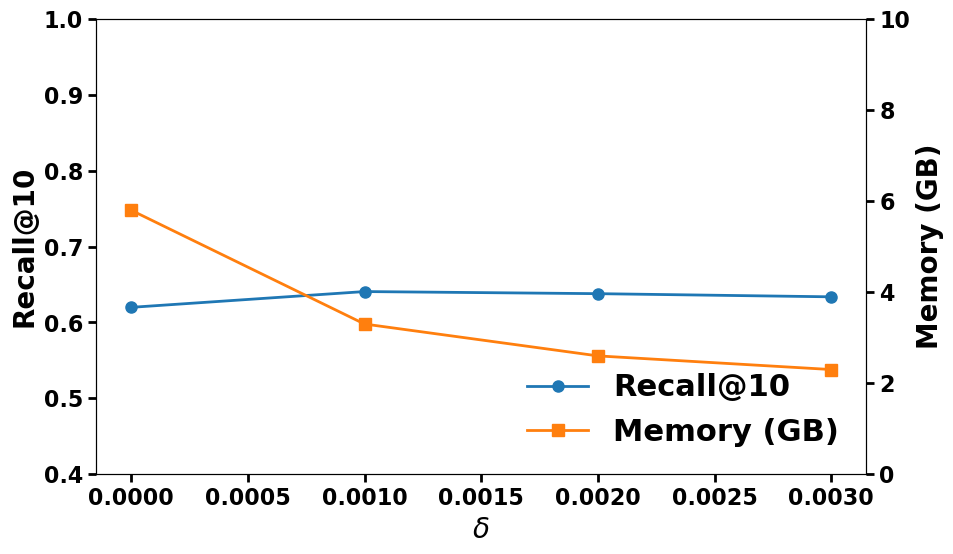

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# --- Data ---
delta = [0.0,  0.001,  0.002,  0.003]
recall = [0.619972, 0.640777, 0.638003, 0.633842]
memory = [5.8, 3.3, 2.6, 2.3] # memory usage in GB

# --- Get tab10 colors ---
cmap = cm.get_cmap('tab10')
color_list = list(getattr(cmap, 'colors', [cmap(i / 10.0) for i in range(10)]))

# Use first two colors
colors = color_list[:2]

# --- Create figure and axis ---
fig, ax1 = plt.subplots(figsize=(10, 6))

# --- Turn off grid completely ---
ax1.grid(False)

# --- Plot Recall curve (circle markers) ---
ax1.plot(delta, recall, marker='o', color=colors[0], linewidth=2, markersize=8,
         label='Recall@10')
ax1.set_xlabel(r'$\delta$', fontsize=20, fontweight='bold')
ax1.set_ylabel('Recall@10', fontsize=20, fontweight='bold', color='black')

# --- Bold tick labels for ax1 ---
ax1.tick_params(axis='x', labelsize=16, width=2, length=6)
ax1.tick_params(axis='y', labelsize=16, width=2, length=6)
for tick in ax1.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax1.get_yticklabels():
    tick.set_fontweight('bold')

# --- Constrain recall y-axis between 0.4 and 1.0 ---
ax1.set_ylim(0.4, 1.0)

# --- Create right y-axis for Memory (square markers) ---
ax2 = ax1.twinx()
ax2.grid(False)

ax2.plot(delta, memory, marker='s', color=colors[1], linewidth=2, markersize=8,
         label='Memory (GB)')
ax2.set_ylabel('Memory (GB)', fontsize=20, fontweight='bold', color='black')

# --- Bold tick labels for ax2 ---
ax2.tick_params(axis='y', labelsize=16, width=2, length=6)
for tick in ax2.get_yticklabels():
    tick.set_fontweight('bold')

# --- Constrain memory y-axis between 50 and 95 (squeezed range) ---
ax2.set_ylim(0, 10)

# --- Legends moved to bottom right ---
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2,
           fontsize=16, loc='lower right', frameon=False, prop={'weight': 'bold'})

# --- Save and show ---
plt.tight_layout()
plt.savefig('recall_memory_vs_delta_MultiQA.png', dpi=300)
plt.show()


/tmp/ipykernel_53880/643676592.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10')


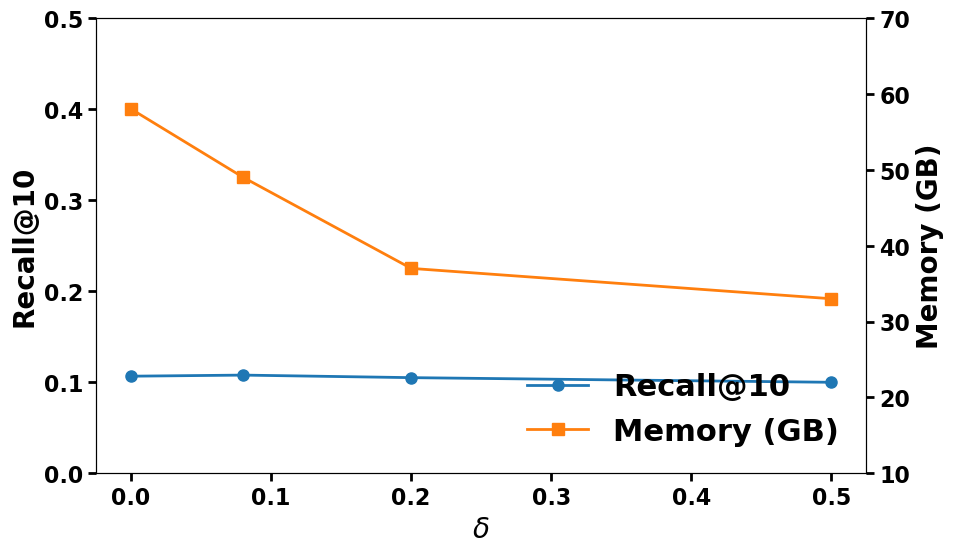

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# --- Data ---
delta = [0, 0.08, 0.2, 0.5]
recall = [0.1066, 0.1078, 0.1050, 0.0999]
memory = [58, 49, 37, 33]

# --- Get tab10 colors ---
cmap = cm.get_cmap('tab10')
color_list = list(getattr(cmap, 'colors', [cmap(i / 10.0) for i in range(10)]))

# Use first two colors
colors = color_list[:2]

# --- Create figure and axis ---
fig, ax1 = plt.subplots(figsize=(10, 6))

# --- Turn off grid completely ---
ax1.grid(False)

# --- Plot Recall curve (circle markers) ---
ax1.plot(delta, recall, marker='o', color=colors[0], linewidth=2, markersize=8,
         label='Recall@10')
ax1.set_xlabel(r'$\delta$', fontsize=20, fontweight='bold')
ax1.set_ylabel('Recall@10', fontsize=20, fontweight='bold', color='black')

# --- Bold tick labels for ax1 ---
ax1.tick_params(axis='x', labelsize=16, width=2, length=6)
ax1.tick_params(axis='y', labelsize=16, width=2, length=6)
for tick in ax1.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax1.get_yticklabels():
    tick.set_fontweight('bold')

ax1.set_ylim(0, 0.5)

# --- Create right y-axis for Memory (square markers) ---
ax2 = ax1.twinx()
ax2.grid(False)

ax2.plot(delta, memory, marker='s', color=colors[1], linewidth=2, markersize=8,
         label='Memory (GB)')
ax2.set_ylabel('Memory (GB)', fontsize=20, fontweight='bold', color='black')

# --- Bold tick labels for ax2 ---
ax2.tick_params(axis='y', labelsize=16, width=2, length=6)
for tick in ax2.get_yticklabels():
    tick.set_fontweight('bold')

# --- Constrain memory y-axis between 50 and 95 (squeezed range) ---
ax2.set_ylim(10, 70)

# --- Legends moved to bottom right ---
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2,
           fontsize=16, loc='lower right', frameon=False, prop={'weight': 'bold'})

# --- Save and show ---
plt.tight_layout()
plt.savefig('recall_memory_vs_delta_clef.png', dpi=300)
plt.show()


/tmp/ipykernel_53880/518157046.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10')


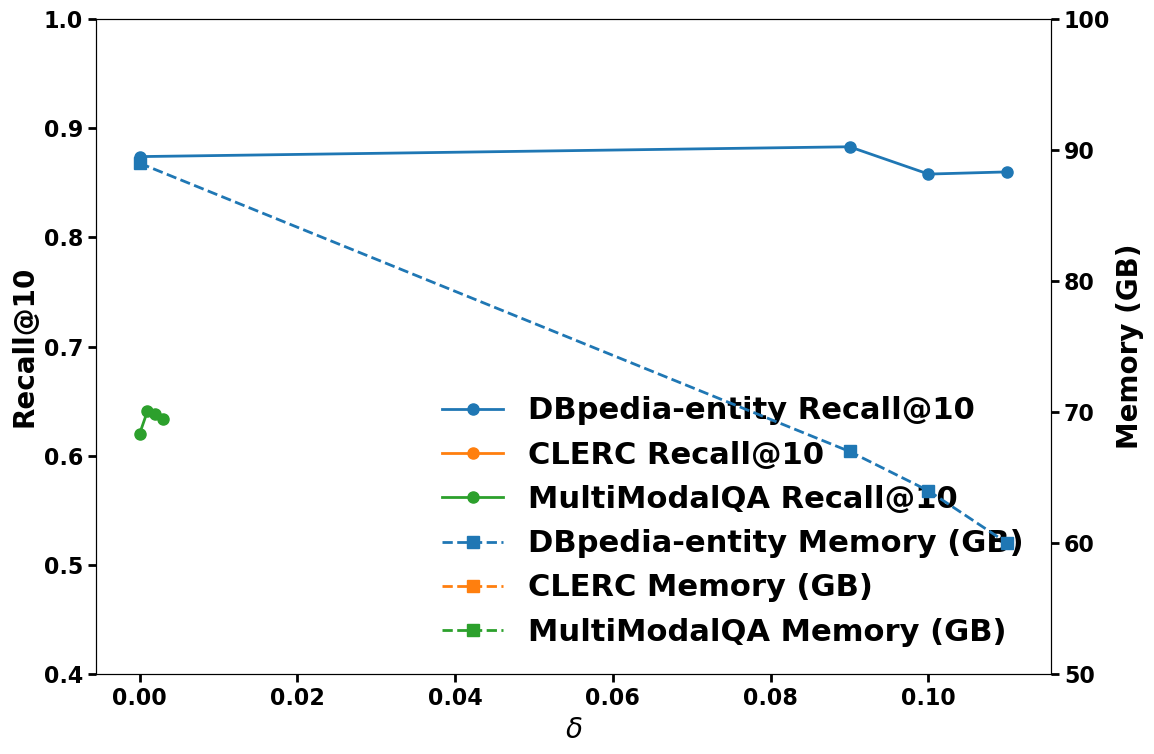

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# --- Multiple datasets ---
datasets = {
    "DBpedia-entity": {
        "delta": [0.0, 0.09, 0.10, 0.11],
        "recall": [0.874, 0.883, 0.858, 0.86],
        "memory": [89, 67, 64, 60]
    },
    "CLERC": {
        "delta": [0.0, 0.007, 0.008, 0.009],
        "recall": [0.258, 0.275, 0.267, 0.263],
        "memory": [164.8, 118.7, 111.36, 108.35]
    },
    "MultiModalQA": {
        "delta": [0.0,  0.001,  0.002,  0.003],
        "recall": [0.619972, 0.640777, 0.638003, 0.633842],
        "memory": [5.8, 3.3, 2.6, 2.3]
    }
}

# --- Colors ---
cmap = cm.get_cmap('tab10')
color_list = list(getattr(cmap, 'colors', [cmap(i / 10.0) for i in range(10)]))

# --- Setup plot ---
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.grid(False)

# --- Right axis ---
ax2 = ax1.twinx()
ax2.grid(False)

# --- Plot each dataset ---
for i, (name, data) in enumerate(datasets.items()):
    col = color_list[i % len(color_list)]
    
    # Recall line
    ax1.plot(
        data["delta"], data["recall"],
        marker='o', linewidth=2, markersize=8, color=col,
        label=f"{name} Recall@10"
    )
    
    # Memory line (dashed to distinguish)
    ax2.plot(
        data["delta"], data["memory"],
        marker='s', linewidth=2, markersize=8,
        color=col, linestyle='--',
        label=f"{name} Memory (GB)"
    )

# --- Labels ---
ax1.set_xlabel(r'$\delta$', fontsize=20, fontweight='bold')
ax1.set_ylabel('Recall@10', fontsize=20, fontweight='bold')
ax2.set_ylabel('Memory (GB)', fontsize=20, fontweight='bold')

# --- Y limits ---
ax1.set_ylim(0.4, 1.0)
ax2.set_ylim(50, 100)

# --- Tick formatting ---
for ax in [ax1, ax2]:
    ax.tick_params(axis='both', labelsize=16, width=2, length=6)
    for tick in ax.get_xticklabels() + ax.get_yticklabels():
        tick.set_fontweight('bold')

# --- Combine legends ---
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(
    lines1 + lines2, labels1 + labels2,
    fontsize=14, loc='lower right', frameon=False,
    prop={'weight': 'bold'}
)

plt.tight_layout()
plt.show()


/tmp/ipykernel_53880/600141078.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab10")


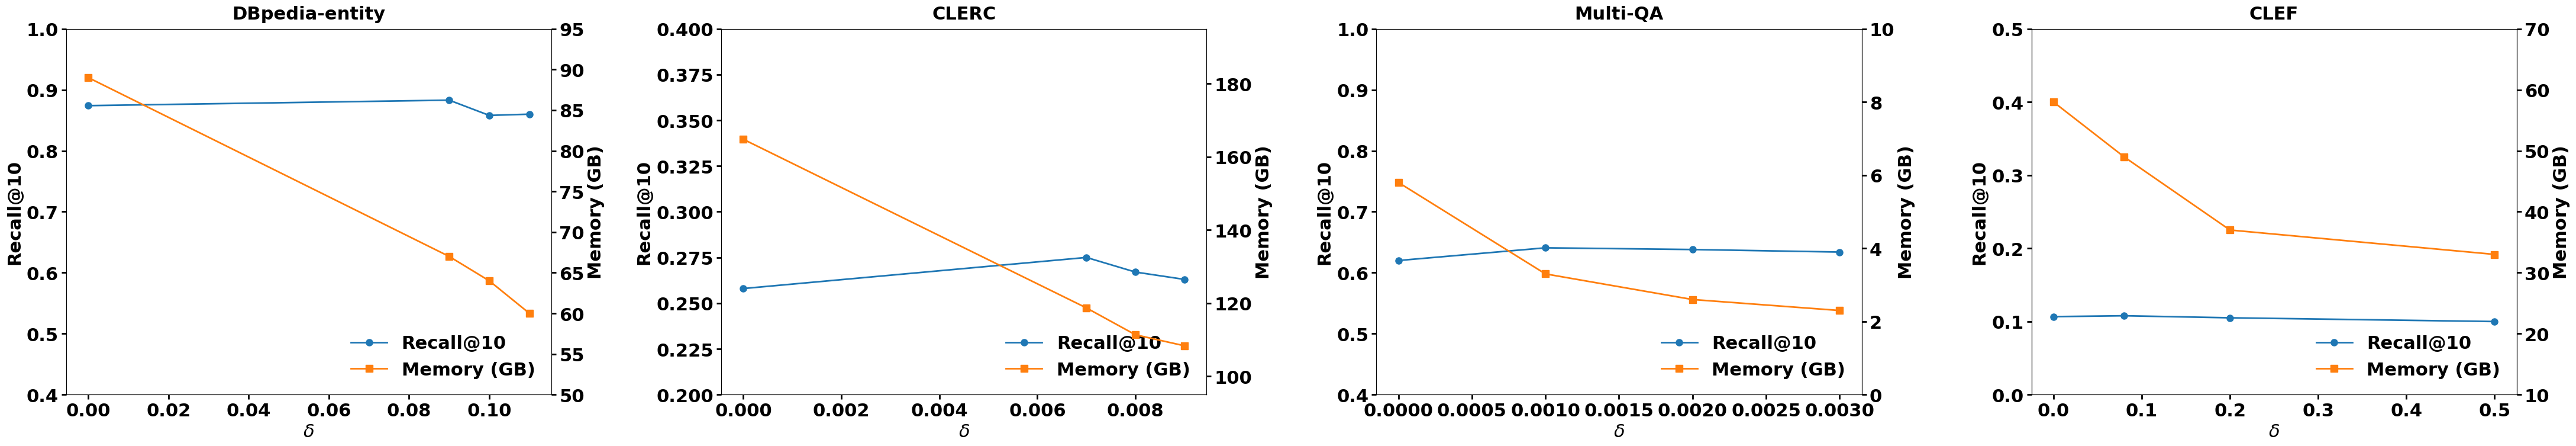

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# --- Data Definition ---
datasets = [
    {
        "title": "DBpedia-entity",
        "delta": [0.0, 0.09, 0.10, 0.11],
        "recall": [0.874, 0.883, 0.858, 0.86],
        "memory": [89, 67, 64, 60],
        # optional:
        "ylim_recall": (0.4, 1.0),
        "ylim_memory": (50, 95),
    },
    {
        "title": "CLERC",
        "delta": [0.0, 0.007, 0.008, 0.009],
        "recall": [0.258, 0.275, 0.267, 0.263],
        "memory": [164.8, 118.7, 111.36, 108.35],
        "ylim_recall": (0.2, 0.4),
        "ylim_memory": (95, 195),
    },
    {
        "title": "Multi-QA",
        "delta": [0.0, 0.001, 0.002, 0.003],
        "recall": [0.619972, 0.640777, 0.638003, 0.633842],
        "memory": [5.8, 3.3, 2.6, 2.3],
        "ylim_recall": (0.4, 1.0),
        "ylim_memory": (0, 10),
    },
    {
        "title": "CLEF",
        "delta": [0, 0.08, 0.2, 0.5],
        "recall": [0.1066, 0.1078, 0.1050, 0.0999],
        "memory": [58, 49, 37, 33],
        "ylim_recall": (0, 0.5),
        "ylim_memory": (10, 70),
    },
]

# --- Colors (tab10) ---
try:
    cmap = cm.get_cmap("tab10")
except AttributeError:
    cmap = plt.get_cmap("tab10")

color_list = list(getattr(cmap, "colors", [cmap(i / 10.0) for i in range(10)]))
colors = color_list[:2]


def _auto_ylim(values, pad_ratio=0.08):
    arr = np.asarray(values, dtype=float)
    vmin = float(np.min(arr))
    vmax = float(np.max(arr))
    if vmin == vmax:
        pad = 0.05 if vmax == 0 else abs(vmax) * 0.05
    else:
        pad = (vmax - vmin) * pad_ratio
    return (vmin - pad, vmax + pad)


# --- Create figure/axes (match number of datasets) ---
n = len(datasets)
fig, axes = plt.subplots(1, n, figsize=(11 * n, 8))
axes = np.atleast_1d(axes)  # makes axes indexable even if n == 1

# --- Plot ---
for i, data in enumerate(datasets):
    ax1 = axes[i]
    delta = data["delta"]
    recall = data["recall"]
    memory = data["memory"]

    ax1.grid(False)

    ax1.plot(
        delta,
        recall,
        marker="o",
        color=colors[0],
        linewidth=2,
        markersize=8,
        label="Recall@10",
    )
    ax1.set_xlabel(r"$\delta$", fontsize=22, fontweight="bold")
    ax1.set_ylabel("Recall@10", fontsize=22, fontweight="bold", color="black")
    ax1.set_title(data["title"], fontsize=22, fontweight="bold", pad=12)

    ax1.tick_params(axis="x", labelsize=22, width=2, length=6)
    ax1.tick_params(axis="y", labelsize=22, width=2, length=6)
    for tick in ax1.get_xticklabels():
        tick.set_fontweight("bold")
    for tick in ax1.get_yticklabels():
        tick.set_fontweight("bold")

    ax1.set_ylim(data.get("ylim_recall", _auto_ylim(recall)))

    ax2 = ax1.twinx()
    ax2.grid(False)
    ax2.plot(
        delta,
        memory,
        marker="s",
        color=colors[1],
        linewidth=2,
        markersize=8,
        label="Memory (GB)",
    )
    ax2.set_ylabel("Memory (GB)", fontsize=22, fontweight="bold", color="black")

    ax2.tick_params(axis="y", labelsize=22, width=2, length=6)
    for tick in ax2.get_yticklabels():
        tick.set_fontweight("bold")

    ax2.set_ylim(data.get("ylim_memory", _auto_ylim(memory)))

    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(
        lines_1 + lines_2,
        labels_1 + labels_2,
        fontsize=22,
        loc="lower right",
        frameon=False,
        prop={"weight": "bold"},
    )

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.savefig("combined_recall_memory_vs_delta.png", dpi=400)
plt.show()